<div class="alert alert-block alert-success">

# Plaut Model > plaut_model

### Purpose
Implement the Plaut Model

### Date Created
November 11, 2019
***
#### Revisions
 - For revisions after Jan 02, 2020: refer to the .py files in the same folder
 - Jan 02, 2020: Happy New Year! Multiple revisions, see below:
     * Minor bug fixes to folder creation in training
     * Migrate model architecture to model.py
     * Migrate code to import data to simulator.py
     * Migrate code to make folder for storing simulation results to helpers.py
     * Migrate training code to simulator.py
 - Dec 30, 2019: Update filepaths in code to match new file organization
 - Nov 28, 2019: Update training epochs to 500+100, add training for anchors
 - Nov 27, 2019: Move dataset class, helper functions to separate files, Add plotting for accuracy for plaut dataset, anchors and probes
 - Nov 25, 2019: Update get_accuracy function to correspond to sigmoid activated output, Lower print/plot frequency
 - Nov 24, 2019: Replace BCEWithLogitsLoss with BCELoss, and added sigmoid activation to model output
 - Nov 21, 2019: Include correct frequency, fixes to dataset structure
 - Nov 14, 2019: Updates to include frequency
 - Nov 11, 2019: Create file, implement initial Plaut model and train

</div>

### Code to Run Simulation

In [2]:
from simulator import *
sim = simulator()
sim.train()

Test Results will be stored in:  /Users/BrianLam/UTSC Research/Plaut_Model/results/jan06_test02
[EPOCH 1] 	 loss: 0.686796 	 time: 0.7303 
[EPOCH 2] 	 loss: 0.686793 	 time: 0.6204 
[EPOCH 3] 	 loss: 0.686787 	 time: 0.6537 
[EPOCH 4] 	 loss: 0.686779 	 time: 0.5952 
[EPOCH 5] 	 loss: 0.686769 	 time: 0.6915 
[EPOCH 6] 	 loss: 0.686757 	 time: 0.7263 
Training Interrupted by User.
An exception occured. Delete plots and checkpoints? [y/n] 
  > n
Add any notes below to save with results:
 > 
Simulation results saved.


### Training Function (old)

In [4]:
def train(model, plaut_loader, plaut_anc_loader, anc_loader, probe_loader, folder, lr=0.001):
    # define loss function and optimizer
    criterion = nn.BCELoss(reduction='none')
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Initialize arrays to store epochs, train loss
    epochs, losses = [], []
    
    # Select word types to calculate accuracy for
    types = ["HEC", "HRI", "HFE", "LEC", "LFRI", "LFEEXPT"] # calculate accuracy of these types
    anc_types = ["ANC_REG", "ANC_EXC", "ANC_AMB"]
    probe_types = ["PRO_REG", "PRO_EXC", "PRO_AMB"]
    
    # Initialize arrays to store accuracy of plaut dataset, anchors, probes
    acc = [[], [], [], []]
    anc_acc = [[] for i in anc_types]
    probe_acc = [[] for i in probe_types]
    
    for epoch in range(600):
        if epoch < 500: # use only plaut dataset for first 500 epochs
            data_loader = plaut_loader
        else: # after, train with both plaut + anchors
            data_loader = plaut_anc_loader
        
        avg_loss = 0 # initialize avg loss
        for i, data in enumerate(data_loader): 
            # extract frequency, inputs, labels
            freq = data["frequency"].float().view(-1, 1) # reshape to [batch_size x 1] to match output size
            inputs = data["graphemes"].float()
            labels = data["phonemes"].float()
            
            #forward pass + backward pass + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss = (loss*freq).mean() # scale loss by frequency, then find mean
            avg_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # calculate loss and save loss to array
        losses.append(avg_loss)
        epochs.append(epoch+1)
        
        # calculate accuracy over the different types for plaut dataset
        temp_acc = get_accuracy(model, plaut_loader, types)
        acc[0].append((temp_acc[0]+temp_acc[1])/2) # average of HFR consistent and inconsistent
        acc[1].append(temp_acc[2]) # HFE
        acc[2].append((temp_acc[3]+temp_acc[4])/2) # average of LFR consistent and inconsistent
        acc[3].append(temp_acc[5]) # LFE
        
        # calculate accuracy over the different types for anchors
        temp_acc = get_accuracy(model, anc_loader, anc_types, vowels_only=True)
        for i in range(len(anc_types)):
            anc_acc[i].append(temp_acc[i])
            
        # calculate accuracy over the different types for probes
        temp_acc = get_accuracy(model, probe_loader, probe_types, vowels_only=True)
        for i in range(len(probe_types)):
            probe_acc[i].append(temp_acc[i])
        
        # print stats every 5 epochs
        if epoch % 1 == 0:
            print("[EPOCH %d] loss: %.6f" % (epoch+1, avg_loss))
        
        # plot loss every 5 epochs
        if epoch % 50 == 49:
            make_plot(epochs, [losses], ["Train Loss"], "Epoch", "Loss", "Training Loss")
            make_plot(epochs, acc, ["HFR", "HFE", "LFR", "LFE"], "Epoch", "Accuracy", "Training Accuracy")
            make_plot(epochs, anc_acc, anc_types, "Epoch", "Accuracy", "Anchor Accuracy")
            make_plot(epochs, probe_acc, probe_types, "Epoch", "Accuracy", "Probe Accuracy")
            

    # plot final loss curve and save
    plt.figure()
    plt.title("Training Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.plot(losses, label="Training Loss")
    plt.savefig(rootdir+"/lossplot_final.png", dpi=150)
    plt.close()

### Training

Test Results saved in : /Users/BrianLam/UTSC Research/Plaut_Model/results/jan01_test01
[EPOCH 1] loss: 2.005025
[EPOCH 2] loss: 0.761653
[EPOCH 3] loss: 0.916140
[EPOCH 4] loss: 0.833535
[EPOCH 5] loss: 0.683057
[EPOCH 6] loss: 0.583609
[EPOCH 7] loss: 0.580636
[EPOCH 8] loss: 0.625002
[EPOCH 9] loss: 0.653815
[EPOCH 10] loss: 0.647629
[EPOCH 11] loss: 0.615382
[EPOCH 12] loss: 0.576462
[EPOCH 13] loss: 0.549712
[EPOCH 14] loss: 0.544086
[EPOCH 15] loss: 0.554972
[EPOCH 16] loss: 0.569968
[EPOCH 17] loss: 0.578402
[EPOCH 18] loss: 0.576153
[EPOCH 19] loss: 0.565118
[EPOCH 20] loss: 0.550576
[EPOCH 21] loss: 0.538279
[EPOCH 22] loss: 0.531908
[EPOCH 23] loss: 0.531679
[EPOCH 24] loss: 0.534836
[EPOCH 25] loss: 0.537646
[EPOCH 26] loss: 0.537471
[EPOCH 27] loss: 0.533734
[EPOCH 28] loss: 0.527637
[EPOCH 29] loss: 0.521171
[EPOCH 30] loss: 0.516019
[EPOCH 31] loss: 0.512850
[EPOCH 32] loss: 0.511229
[EPOCH 33] loss: 0.510051
[EPOCH 34] loss: 0.508133
[EPOCH 35] loss: 0.504707
[EPOCH 36] l

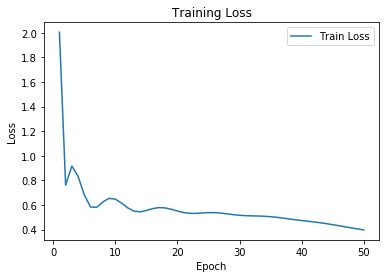

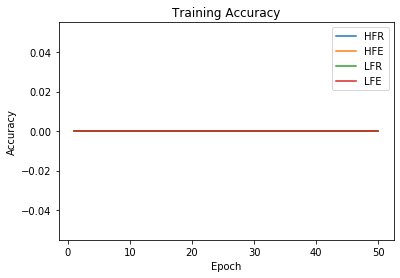

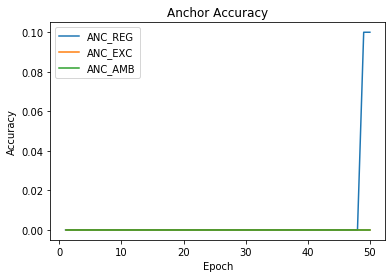

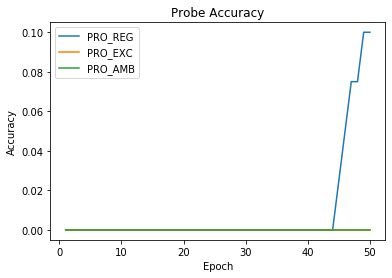

[EPOCH 51] loss: 0.388859
[EPOCH 52] loss: 0.380561
[EPOCH 53] loss: 0.372071
[EPOCH 54] loss: 0.363506
[EPOCH 55] loss: 0.355042
[EPOCH 56] loss: 0.346820
[EPOCH 57] loss: 0.338873
[EPOCH 58] loss: 0.331135
[EPOCH 59] loss: 0.323494
[EPOCH 60] loss: 0.315871
[EPOCH 61] loss: 0.308264
[EPOCH 62] loss: 0.300742
[EPOCH 63] loss: 0.293401
[EPOCH 64] loss: 0.286312
[EPOCH 65] loss: 0.279488
[EPOCH 66] loss: 0.272896
[EPOCH 67] loss: 0.266485
[EPOCH 68] loss: 0.260224
[EPOCH 69] loss: 0.254114
[EPOCH 70] loss: 0.248185
[EPOCH 71] loss: 0.242469
[EPOCH 72] loss: 0.236978
[EPOCH 73] loss: 0.231697
[EPOCH 74] loss: 0.226594
[EPOCH 75] loss: 0.221639
[EPOCH 76] loss: 0.216818
[EPOCH 77] loss: 0.212134
[EPOCH 78] loss: 0.207601
[EPOCH 79] loss: 0.203226
[EPOCH 80] loss: 0.199004
[EPOCH 81] loss: 0.194921
[EPOCH 82] loss: 0.190963
[EPOCH 83] loss: 0.187119
[EPOCH 84] loss: 0.183389
[EPOCH 85] loss: 0.179774
[EPOCH 86] loss: 0.176277
[EPOCH 87] loss: 0.172893
[EPOCH 88] loss: 0.169611
[EPOCH 89] l

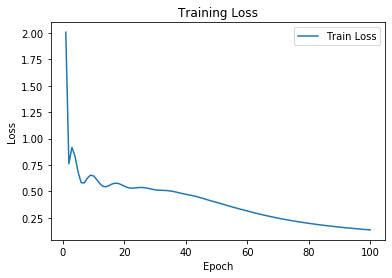

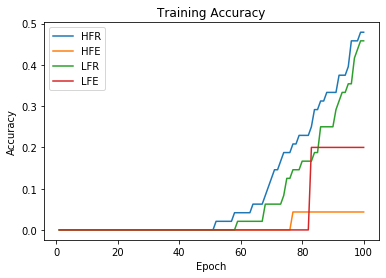

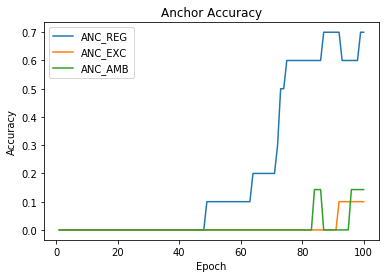

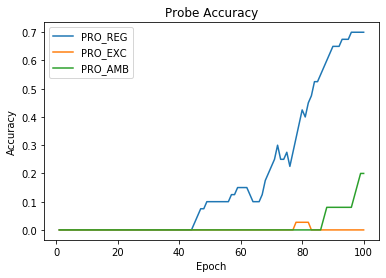

[EPOCH 101] loss: 0.134247
[EPOCH 102] loss: 0.132026
[EPOCH 103] loss: 0.129870
[EPOCH 104] loss: 0.127776
[EPOCH 105] loss: 0.125744
[EPOCH 106] loss: 0.123772
[EPOCH 107] loss: 0.121859
[EPOCH 108] loss: 0.120003
[EPOCH 109] loss: 0.118200
[EPOCH 110] loss: 0.116448
[EPOCH 111] loss: 0.114746
[EPOCH 112] loss: 0.113092
[EPOCH 113] loss: 0.111485
[EPOCH 114] loss: 0.109923
[EPOCH 115] loss: 0.108404
[EPOCH 116] loss: 0.106928
[EPOCH 117] loss: 0.105493
[EPOCH 118] loss: 0.104098
[EPOCH 119] loss: 0.102743
[EPOCH 120] loss: 0.101427
[EPOCH 121] loss: 0.100148
[EPOCH 122] loss: 0.098906
[EPOCH 123] loss: 0.097698
[EPOCH 124] loss: 0.096523
[EPOCH 125] loss: 0.095381
[EPOCH 126] loss: 0.094269
[EPOCH 127] loss: 0.093187
[EPOCH 128] loss: 0.092134
[EPOCH 129] loss: 0.091108
[EPOCH 130] loss: 0.090107
[EPOCH 131] loss: 0.089132
[EPOCH 132] loss: 0.088181
[EPOCH 133] loss: 0.087253
[EPOCH 134] loss: 0.086348
[EPOCH 135] loss: 0.085465
[EPOCH 136] loss: 0.084603
[EPOCH 137] loss: 0.083761
[

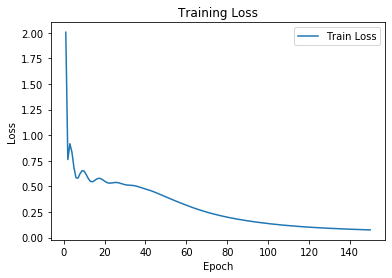

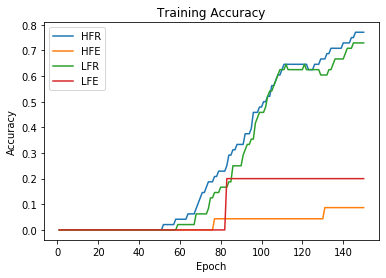

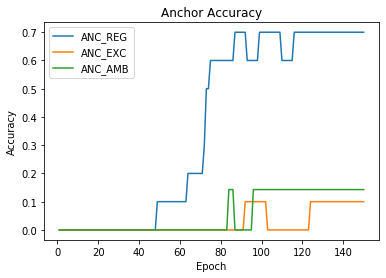

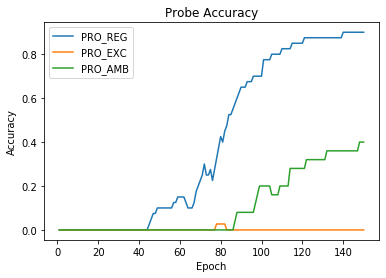

[EPOCH 151] loss: 0.073793
[EPOCH 152] loss: 0.073189
[EPOCH 153] loss: 0.072596
[EPOCH 154] loss: 0.072015
[EPOCH 155] loss: 0.071445
[EPOCH 156] loss: 0.070886
[EPOCH 157] loss: 0.070336
[EPOCH 158] loss: 0.069797
[EPOCH 159] loss: 0.069267
[EPOCH 160] loss: 0.068747
[EPOCH 161] loss: 0.068235
[EPOCH 162] loss: 0.067732
[EPOCH 163] loss: 0.067238
[EPOCH 164] loss: 0.066752
[EPOCH 165] loss: 0.066274
[EPOCH 166] loss: 0.065803
[EPOCH 167] loss: 0.065340
[EPOCH 168] loss: 0.064885
[EPOCH 169] loss: 0.064437
[EPOCH 170] loss: 0.063996
[EPOCH 171] loss: 0.063561
[EPOCH 172] loss: 0.063134
[EPOCH 173] loss: 0.062713
[EPOCH 174] loss: 0.062298
[EPOCH 175] loss: 0.061890
[EPOCH 176] loss: 0.061488
[EPOCH 177] loss: 0.061091
[EPOCH 178] loss: 0.060701
[EPOCH 179] loss: 0.060316
[EPOCH 180] loss: 0.059937
[EPOCH 181] loss: 0.059564
[EPOCH 182] loss: 0.059195
[EPOCH 183] loss: 0.058832
[EPOCH 184] loss: 0.058474
[EPOCH 185] loss: 0.058121
[EPOCH 186] loss: 0.057772
[EPOCH 187] loss: 0.057428
[

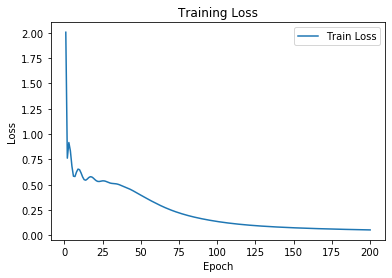

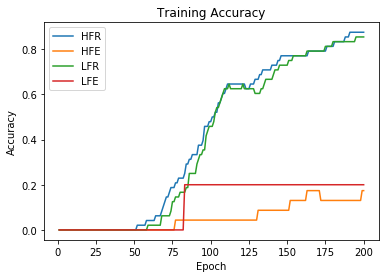

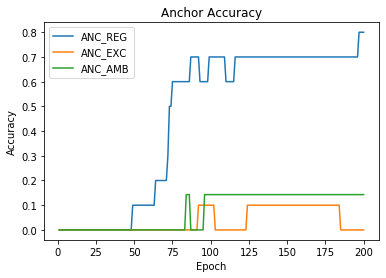

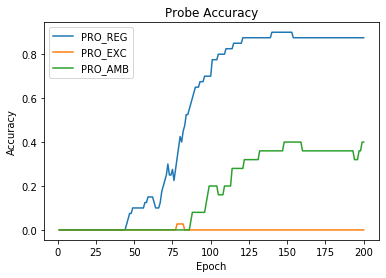

[EPOCH 201] loss: 0.053035
[EPOCH 202] loss: 0.052747
[EPOCH 203] loss: 0.052463
[EPOCH 204] loss: 0.052182
[EPOCH 205] loss: 0.051904
[EPOCH 206] loss: 0.051628
[EPOCH 207] loss: 0.051356
[EPOCH 208] loss: 0.051086
[EPOCH 209] loss: 0.050819
[EPOCH 210] loss: 0.050555
[EPOCH 211] loss: 0.050294
[EPOCH 212] loss: 0.050035
[EPOCH 213] loss: 0.049779
[EPOCH 214] loss: 0.049525
[EPOCH 215] loss: 0.049274
[EPOCH 216] loss: 0.049025
[EPOCH 217] loss: 0.048778
[EPOCH 218] loss: 0.048534
[EPOCH 219] loss: 0.048292
[EPOCH 220] loss: 0.048053
[EPOCH 221] loss: 0.047815
[EPOCH 222] loss: 0.047580
[EPOCH 223] loss: 0.047347
[EPOCH 224] loss: 0.047116
[EPOCH 225] loss: 0.046887
[EPOCH 226] loss: 0.046659
[EPOCH 227] loss: 0.046434
[EPOCH 228] loss: 0.046211
[EPOCH 229] loss: 0.045990
[EPOCH 230] loss: 0.045770
[EPOCH 231] loss: 0.045552
[EPOCH 232] loss: 0.045336
[EPOCH 233] loss: 0.045122
[EPOCH 234] loss: 0.044909
[EPOCH 235] loss: 0.044699
[EPOCH 236] loss: 0.044489
[EPOCH 237] loss: 0.044282
[

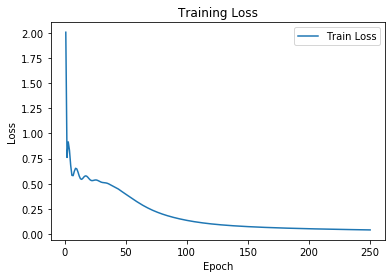

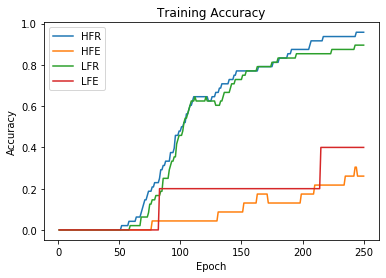

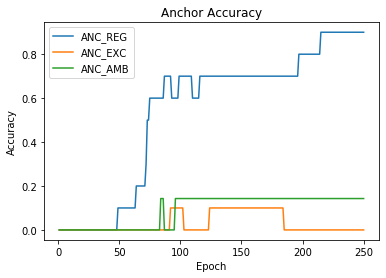

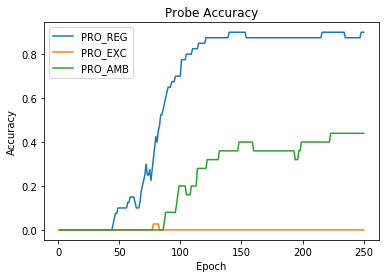

[EPOCH 251] loss: 0.041539
[EPOCH 252] loss: 0.041355
[EPOCH 253] loss: 0.041171
[EPOCH 254] loss: 0.040989
[EPOCH 255] loss: 0.040809
[EPOCH 256] loss: 0.040630
[EPOCH 257] loss: 0.040452
[EPOCH 258] loss: 0.040276
[EPOCH 259] loss: 0.040101
[EPOCH 260] loss: 0.039927
[EPOCH 261] loss: 0.039755
[EPOCH 262] loss: 0.039584
[EPOCH 263] loss: 0.039414
[EPOCH 264] loss: 0.039246
[EPOCH 265] loss: 0.039078
[EPOCH 266] loss: 0.038912
[EPOCH 267] loss: 0.038747
[EPOCH 268] loss: 0.038583
[EPOCH 269] loss: 0.038420
[EPOCH 270] loss: 0.038258
[EPOCH 271] loss: 0.038098
[EPOCH 272] loss: 0.037938
[EPOCH 273] loss: 0.037780
[EPOCH 274] loss: 0.037622
[EPOCH 275] loss: 0.037465
[EPOCH 276] loss: 0.037310
[EPOCH 277] loss: 0.037155
[EPOCH 278] loss: 0.037002
[EPOCH 279] loss: 0.036849
[EPOCH 280] loss: 0.036697
[EPOCH 281] loss: 0.036546
[EPOCH 282] loss: 0.036397
[EPOCH 283] loss: 0.036248
[EPOCH 284] loss: 0.036100
[EPOCH 285] loss: 0.035953
[EPOCH 286] loss: 0.035807
[EPOCH 287] loss: 0.035662
[

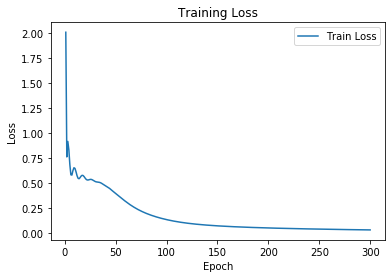

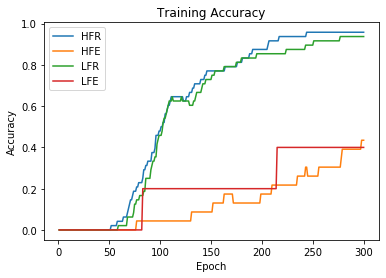

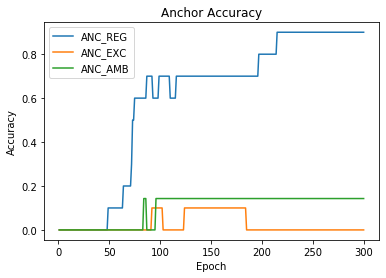

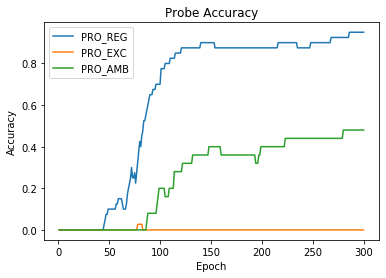

[EPOCH 301] loss: 0.033720
[EPOCH 302] loss: 0.033587
[EPOCH 303] loss: 0.033455
[EPOCH 304] loss: 0.033324
[EPOCH 305] loss: 0.033194
[EPOCH 306] loss: 0.033064
[EPOCH 307] loss: 0.032935
[EPOCH 308] loss: 0.032806
[EPOCH 309] loss: 0.032679
[EPOCH 310] loss: 0.032552
[EPOCH 311] loss: 0.032425
[EPOCH 312] loss: 0.032299
[EPOCH 313] loss: 0.032174
[EPOCH 314] loss: 0.032050
[EPOCH 315] loss: 0.031926
[EPOCH 316] loss: 0.031803
[EPOCH 317] loss: 0.031680
[EPOCH 318] loss: 0.031558
[EPOCH 319] loss: 0.031437
[EPOCH 320] loss: 0.031316
[EPOCH 321] loss: 0.031196
[EPOCH 322] loss: 0.031077
[EPOCH 323] loss: 0.030958
[EPOCH 324] loss: 0.030840
[EPOCH 325] loss: 0.030722
[EPOCH 326] loss: 0.030605
[EPOCH 327] loss: 0.030489
[EPOCH 328] loss: 0.030374
[EPOCH 329] loss: 0.030259
[EPOCH 330] loss: 0.030145
[EPOCH 331] loss: 0.030032
[EPOCH 332] loss: 0.029919
[EPOCH 333] loss: 0.029806
[EPOCH 334] loss: 0.029695
[EPOCH 335] loss: 0.029584
[EPOCH 336] loss: 0.029474
[EPOCH 337] loss: 0.029364
[

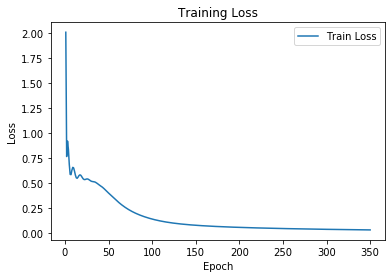

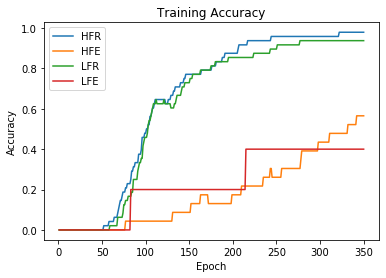

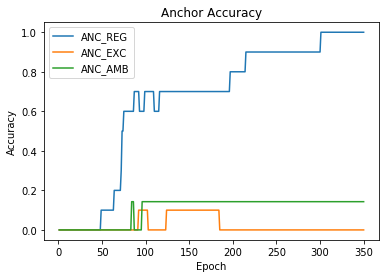

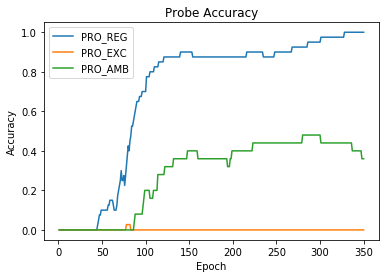

[EPOCH 351] loss: 0.027890
[EPOCH 352] loss: 0.027789
[EPOCH 353] loss: 0.027688
[EPOCH 354] loss: 0.027588
[EPOCH 355] loss: 0.027488
[EPOCH 356] loss: 0.027389
[EPOCH 357] loss: 0.027291
[EPOCH 358] loss: 0.027193
[EPOCH 359] loss: 0.027096
[EPOCH 360] loss: 0.026999
[EPOCH 361] loss: 0.026902
[EPOCH 362] loss: 0.026806
[EPOCH 363] loss: 0.026711
[EPOCH 364] loss: 0.026616
[EPOCH 365] loss: 0.026522
[EPOCH 366] loss: 0.026428
[EPOCH 367] loss: 0.026335
[EPOCH 368] loss: 0.026242
[EPOCH 369] loss: 0.026149
[EPOCH 370] loss: 0.026057
[EPOCH 371] loss: 0.025966
[EPOCH 372] loss: 0.025875
[EPOCH 373] loss: 0.025784
[EPOCH 374] loss: 0.025694
[EPOCH 375] loss: 0.025605
[EPOCH 376] loss: 0.025516
[EPOCH 377] loss: 0.025427
[EPOCH 378] loss: 0.025339
[EPOCH 379] loss: 0.025251
[EPOCH 380] loss: 0.025164
[EPOCH 381] loss: 0.025077
[EPOCH 382] loss: 0.024991
[EPOCH 383] loss: 0.024905
[EPOCH 384] loss: 0.024819
[EPOCH 385] loss: 0.024734
[EPOCH 386] loss: 0.024650
[EPOCH 387] loss: 0.024565
[

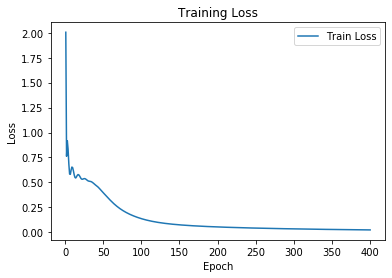

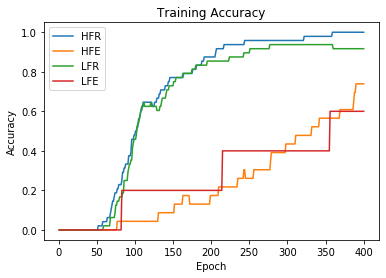

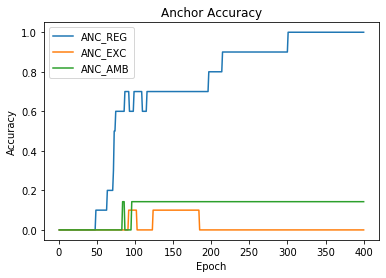

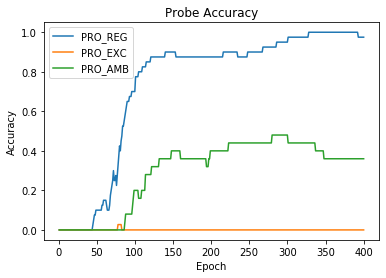

[EPOCH 401] loss: 0.023429
[EPOCH 402] loss: 0.023351
[EPOCH 403] loss: 0.023273
[EPOCH 404] loss: 0.023196
[EPOCH 405] loss: 0.023119
[EPOCH 406] loss: 0.023042
[EPOCH 407] loss: 0.022966
[EPOCH 408] loss: 0.022889
[EPOCH 409] loss: 0.022814
[EPOCH 410] loss: 0.022738
[EPOCH 411] loss: 0.022663
[EPOCH 412] loss: 0.022589
[EPOCH 413] loss: 0.022514
[EPOCH 414] loss: 0.022440
[EPOCH 415] loss: 0.022367
[EPOCH 416] loss: 0.022293
[EPOCH 417] loss: 0.022220
[EPOCH 418] loss: 0.022147
[EPOCH 419] loss: 0.022075
[EPOCH 420] loss: 0.022003
[EPOCH 421] loss: 0.021931
[EPOCH 422] loss: 0.021860
[EPOCH 423] loss: 0.021789
[EPOCH 424] loss: 0.021718
[EPOCH 425] loss: 0.021647
[EPOCH 426] loss: 0.021577
[EPOCH 427] loss: 0.021507
[EPOCH 428] loss: 0.021438
[EPOCH 429] loss: 0.021368
[EPOCH 430] loss: 0.021299
[EPOCH 431] loss: 0.021230
[EPOCH 432] loss: 0.021162
[EPOCH 433] loss: 0.021094
[EPOCH 434] loss: 0.021026
[EPOCH 435] loss: 0.020958
[EPOCH 436] loss: 0.020891
[EPOCH 437] loss: 0.020824
[

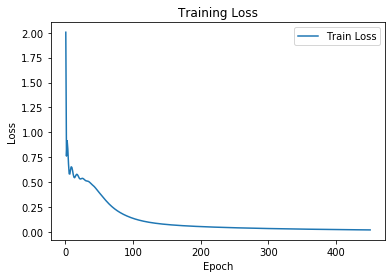

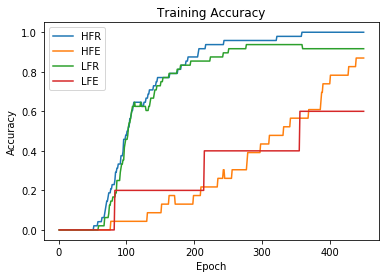

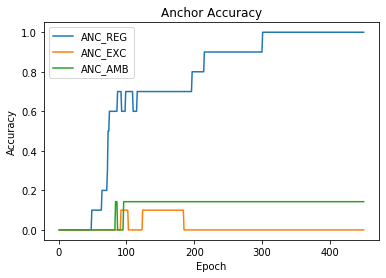

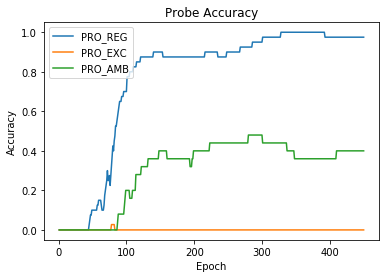

[EPOCH 451] loss: 0.019916
[EPOCH 452] loss: 0.019853
[EPOCH 453] loss: 0.019790
[EPOCH 454] loss: 0.019728
[EPOCH 455] loss: 0.019666
[EPOCH 456] loss: 0.019604
[EPOCH 457] loss: 0.019543
[EPOCH 458] loss: 0.019481
[EPOCH 459] loss: 0.019420
[EPOCH 460] loss: 0.019359
[EPOCH 461] loss: 0.019299
[EPOCH 462] loss: 0.019238
[EPOCH 463] loss: 0.019178
[EPOCH 464] loss: 0.019118
[EPOCH 465] loss: 0.019059
[EPOCH 466] loss: 0.018999
[EPOCH 467] loss: 0.018940
[EPOCH 468] loss: 0.018881
[EPOCH 469] loss: 0.018822
[EPOCH 470] loss: 0.018764
[EPOCH 471] loss: 0.018706
[EPOCH 472] loss: 0.018647
[EPOCH 473] loss: 0.018589
[EPOCH 474] loss: 0.018532
[EPOCH 475] loss: 0.018474
[EPOCH 476] loss: 0.018417
[EPOCH 477] loss: 0.018360
[EPOCH 478] loss: 0.018303
[EPOCH 479] loss: 0.018246
[EPOCH 480] loss: 0.018190
[EPOCH 481] loss: 0.018133
[EPOCH 482] loss: 0.018077
[EPOCH 483] loss: 0.018021
[EPOCH 484] loss: 0.017965
[EPOCH 485] loss: 0.017910
[EPOCH 486] loss: 0.017854
[EPOCH 487] loss: 0.017799
[

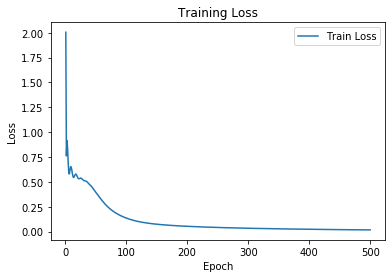

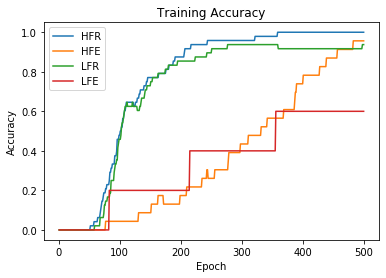

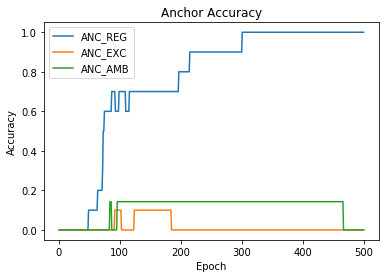

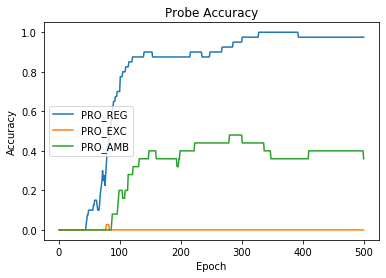

[EPOCH 501] loss: 0.007078
[EPOCH 502] loss: 0.007042
[EPOCH 503] loss: 0.006987
[EPOCH 504] loss: 0.006917
[EPOCH 505] loss: 0.006838
[EPOCH 506] loss: 0.006751
[EPOCH 507] loss: 0.006663
[EPOCH 508] loss: 0.006575
[EPOCH 509] loss: 0.006491
[EPOCH 510] loss: 0.006411
[EPOCH 511] loss: 0.006337
[EPOCH 512] loss: 0.006268
[EPOCH 513] loss: 0.006206
[EPOCH 514] loss: 0.006150
[EPOCH 515] loss: 0.006099
[EPOCH 516] loss: 0.006051
[EPOCH 517] loss: 0.006006
[EPOCH 518] loss: 0.005962
[EPOCH 519] loss: 0.005920
[EPOCH 520] loss: 0.005881
[EPOCH 521] loss: 0.005843
[EPOCH 522] loss: 0.005809
[EPOCH 523] loss: 0.005776
[EPOCH 524] loss: 0.005746
[EPOCH 525] loss: 0.005717
[EPOCH 526] loss: 0.005689
[EPOCH 527] loss: 0.005662
[EPOCH 528] loss: 0.005636
[EPOCH 529] loss: 0.005611
[EPOCH 530] loss: 0.005587
[EPOCH 531] loss: 0.005564
[EPOCH 532] loss: 0.005542
[EPOCH 533] loss: 0.005521
[EPOCH 534] loss: 0.005500
[EPOCH 535] loss: 0.005481
[EPOCH 536] loss: 0.005462
[EPOCH 537] loss: 0.005444
[

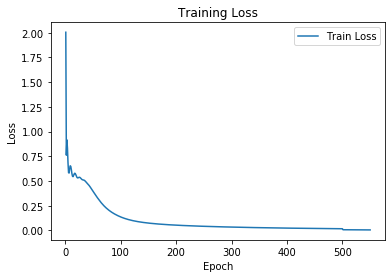

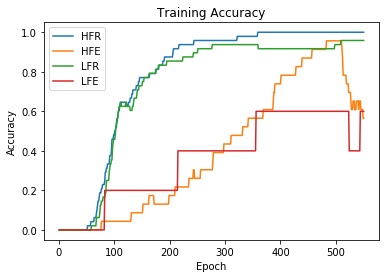

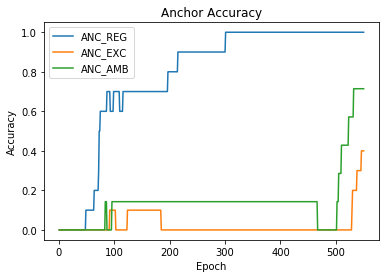

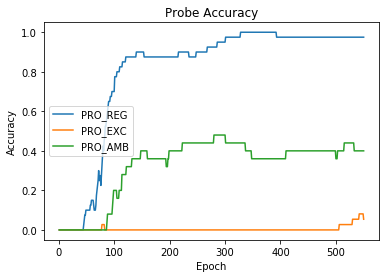

[EPOCH 551] loss: 0.005245
[EPOCH 552] loss: 0.005233
[EPOCH 553] loss: 0.005222
[EPOCH 554] loss: 0.005211
[EPOCH 555] loss: 0.005200
[EPOCH 556] loss: 0.005189
[EPOCH 557] loss: 0.005179
[EPOCH 558] loss: 0.005169
[EPOCH 559] loss: 0.005158
[EPOCH 560] loss: 0.005148
[EPOCH 561] loss: 0.005139
[EPOCH 562] loss: 0.005129
[EPOCH 563] loss: 0.005120
[EPOCH 564] loss: 0.005110
[EPOCH 565] loss: 0.005101
[EPOCH 566] loss: 0.005092
[EPOCH 567] loss: 0.005083
[EPOCH 568] loss: 0.005074
[EPOCH 569] loss: 0.005065
[EPOCH 570] loss: 0.005056
[EPOCH 571] loss: 0.005048
[EPOCH 572] loss: 0.005039
[EPOCH 573] loss: 0.005031
[EPOCH 574] loss: 0.005023
[EPOCH 575] loss: 0.005015
[EPOCH 576] loss: 0.005007
[EPOCH 577] loss: 0.004999
[EPOCH 578] loss: 0.004991
[EPOCH 579] loss: 0.004983
[EPOCH 580] loss: 0.004975
[EPOCH 581] loss: 0.004967
[EPOCH 582] loss: 0.004960
[EPOCH 583] loss: 0.004952
[EPOCH 584] loss: 0.004945
[EPOCH 585] loss: 0.004937
[EPOCH 586] loss: 0.004930
[EPOCH 587] loss: 0.004922
[

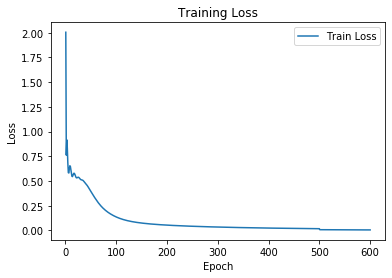

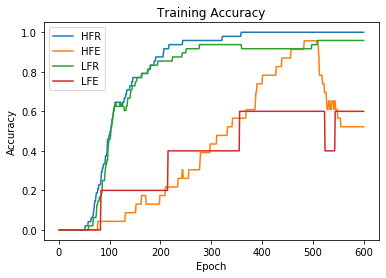

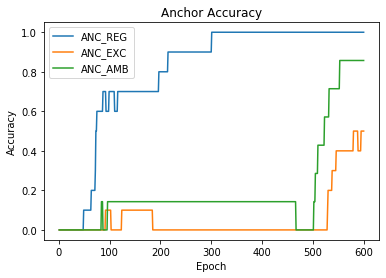

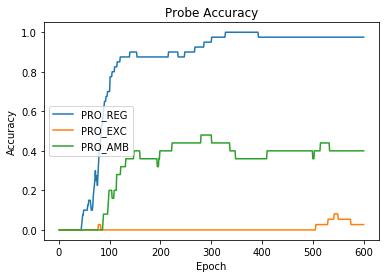

FileNotFoundError: [Errno 2] No such file or directory: '../test//Users/BrianLam/UTSC Research/Plaut_Model/results/jan01_test01/lossplot_final.png'

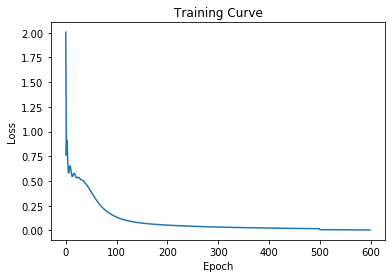

In [20]:
# create a new folder for every run
path = Path(os.getcwd()).parent #get parent (Plaut_Model) directory filepath
now = datetime.datetime.now()
date = now.strftime("%b").lower()+now.strftime("%d")
i = 1

while True:
    try:
        rootdir = str(path)+"/results/"+date+"_test"+'{:02d}'.format(i)
        os.mkdir(rootdir)
        break
    except:
        i += 1


print("Test Results saved in :", rootdir)

torch.manual_seed(1) # initialize random seed
model = plaut_net() # initialize model
train(model, plaut_loader, plaut_anc_loader, anc_loader, probe_loader, rootdir, lr=0.1) # train!!!!

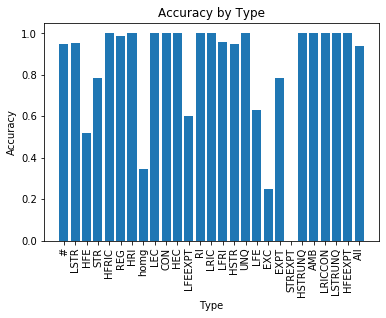

In [7]:
# obtain list of categories in dataset, and add "All" for overall accuracy
types = list(plaut_ds.df["type"].unique())
types.append("All")
    
accuracy = get_accuracy(model, plaut_loader, types)


# plot in bar graph
plt.bar(types, accuracy)
plt.xticks(rotation='vertical')
plt.xlabel("Type")
plt.ylabel("Accuracy")
plt.title("Accuracy by Type")
plt.savefig("../test/"+rootdir+"/accuracy_chart_final.png", dpi=150)
plt.show()


In [8]:
# function to get the accuracy of a particular category
def get_accuracy2 (model, train_loader, cat='All'):
    correct = 0
    total = 0
    for i, data in enumerate (train_loader): # get batch from dataloader
        # extract inputs, labels, type from batch
        inputs = data["graphemes"].float()
        labels = data["phonemes"].float()
        types = pd.DataFrame(data["type"])
        
        outputs = model(inputs) # find prediction using model
        outputs = outputs.round() # round output to 0 or 1
        compare = torch.eq(outputs, labels).sum(dim=1) # compare with labels
        
        if cat == 'All':
            correct += torch.eq(compare, 61).sum().item() # count as correct if all 61 elements match label
            total += len(compare)
        else:
            types = types.apply(lambda x: x == cat) # check for desired type
            compare = pd.DataFrame(compare)
            correct += ((types == True) & (compare == 61)).sum()[0] # count as correct if desired type AND all 61 elements match total
            total += (types==True).sum()[0] # count all of the desired type
    
    return correct/(total) # return accuracy

In [9]:
def get_accuracy_vowels (model, train_loader, cat=['REG', 'EXC', 'AMB']):
    correct = [0, 0, 0]
    total = [0, 0, 0]
    for i, data in enumerate (train_loader):
        inputs = data["graphemes"].float()
        labels = data["phonemes"].float()
        labels = labels[:, len(phoneme_onset):len(phoneme_onset)+len(phoneme_vowel)]
        
        outputs = model(inputs)
        outputs = outputs[:, len(phoneme_onset):len(phoneme_onset)+len(phoneme_vowel)]
        outputs = torch.sigmoid(outputs).round()
        compare = torch.eq(outputs, labels).sum(dim=1)
        for i in range(len(cat)):
            types = pd.DataFrame(data["type"])
            #print(types)
            types = types.apply(lambda x: x == cat[i])
            #print(types)
            #break
            compare = pd.DataFrame(compare)
            correct[i] += ((types == True) & (compare == len(phoneme_vowel))).sum()[0]
            total[i] += (types==True).sum()[0]
    return correct, total